#Loan Default Analysis

Dataset had been taken from Kaggle : https://www.kaggle.com/datasets/yasserh/loan-default-dataset

##Dataset

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
path = "D:\Download\loandefault.csv"
df = pd.read_csv(path)

In [43]:
df.shape

(148670, 34)

In [44]:
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,0,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,0,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,1,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,1,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,1,39.0


In [45]:
pd.set_option("display.max_columns", df.shape[-1])     ##display all columns
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,0,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,0,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,1,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,1,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,1,39.0


In [46]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [47]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [48]:
df.dtypes

id                             int64
year                           int64
loan_limit                    object
gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
credit_worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
interest_rate_spread         float64
upfront_charges              float64
term                         float64
neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
secured_by                    object
total_units                   object
income                       float64
credit_type                   object
credit_score                   int64
co-applicant_credit_type      object
a

In [49]:
df.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.753555,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,1.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,1.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,1.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


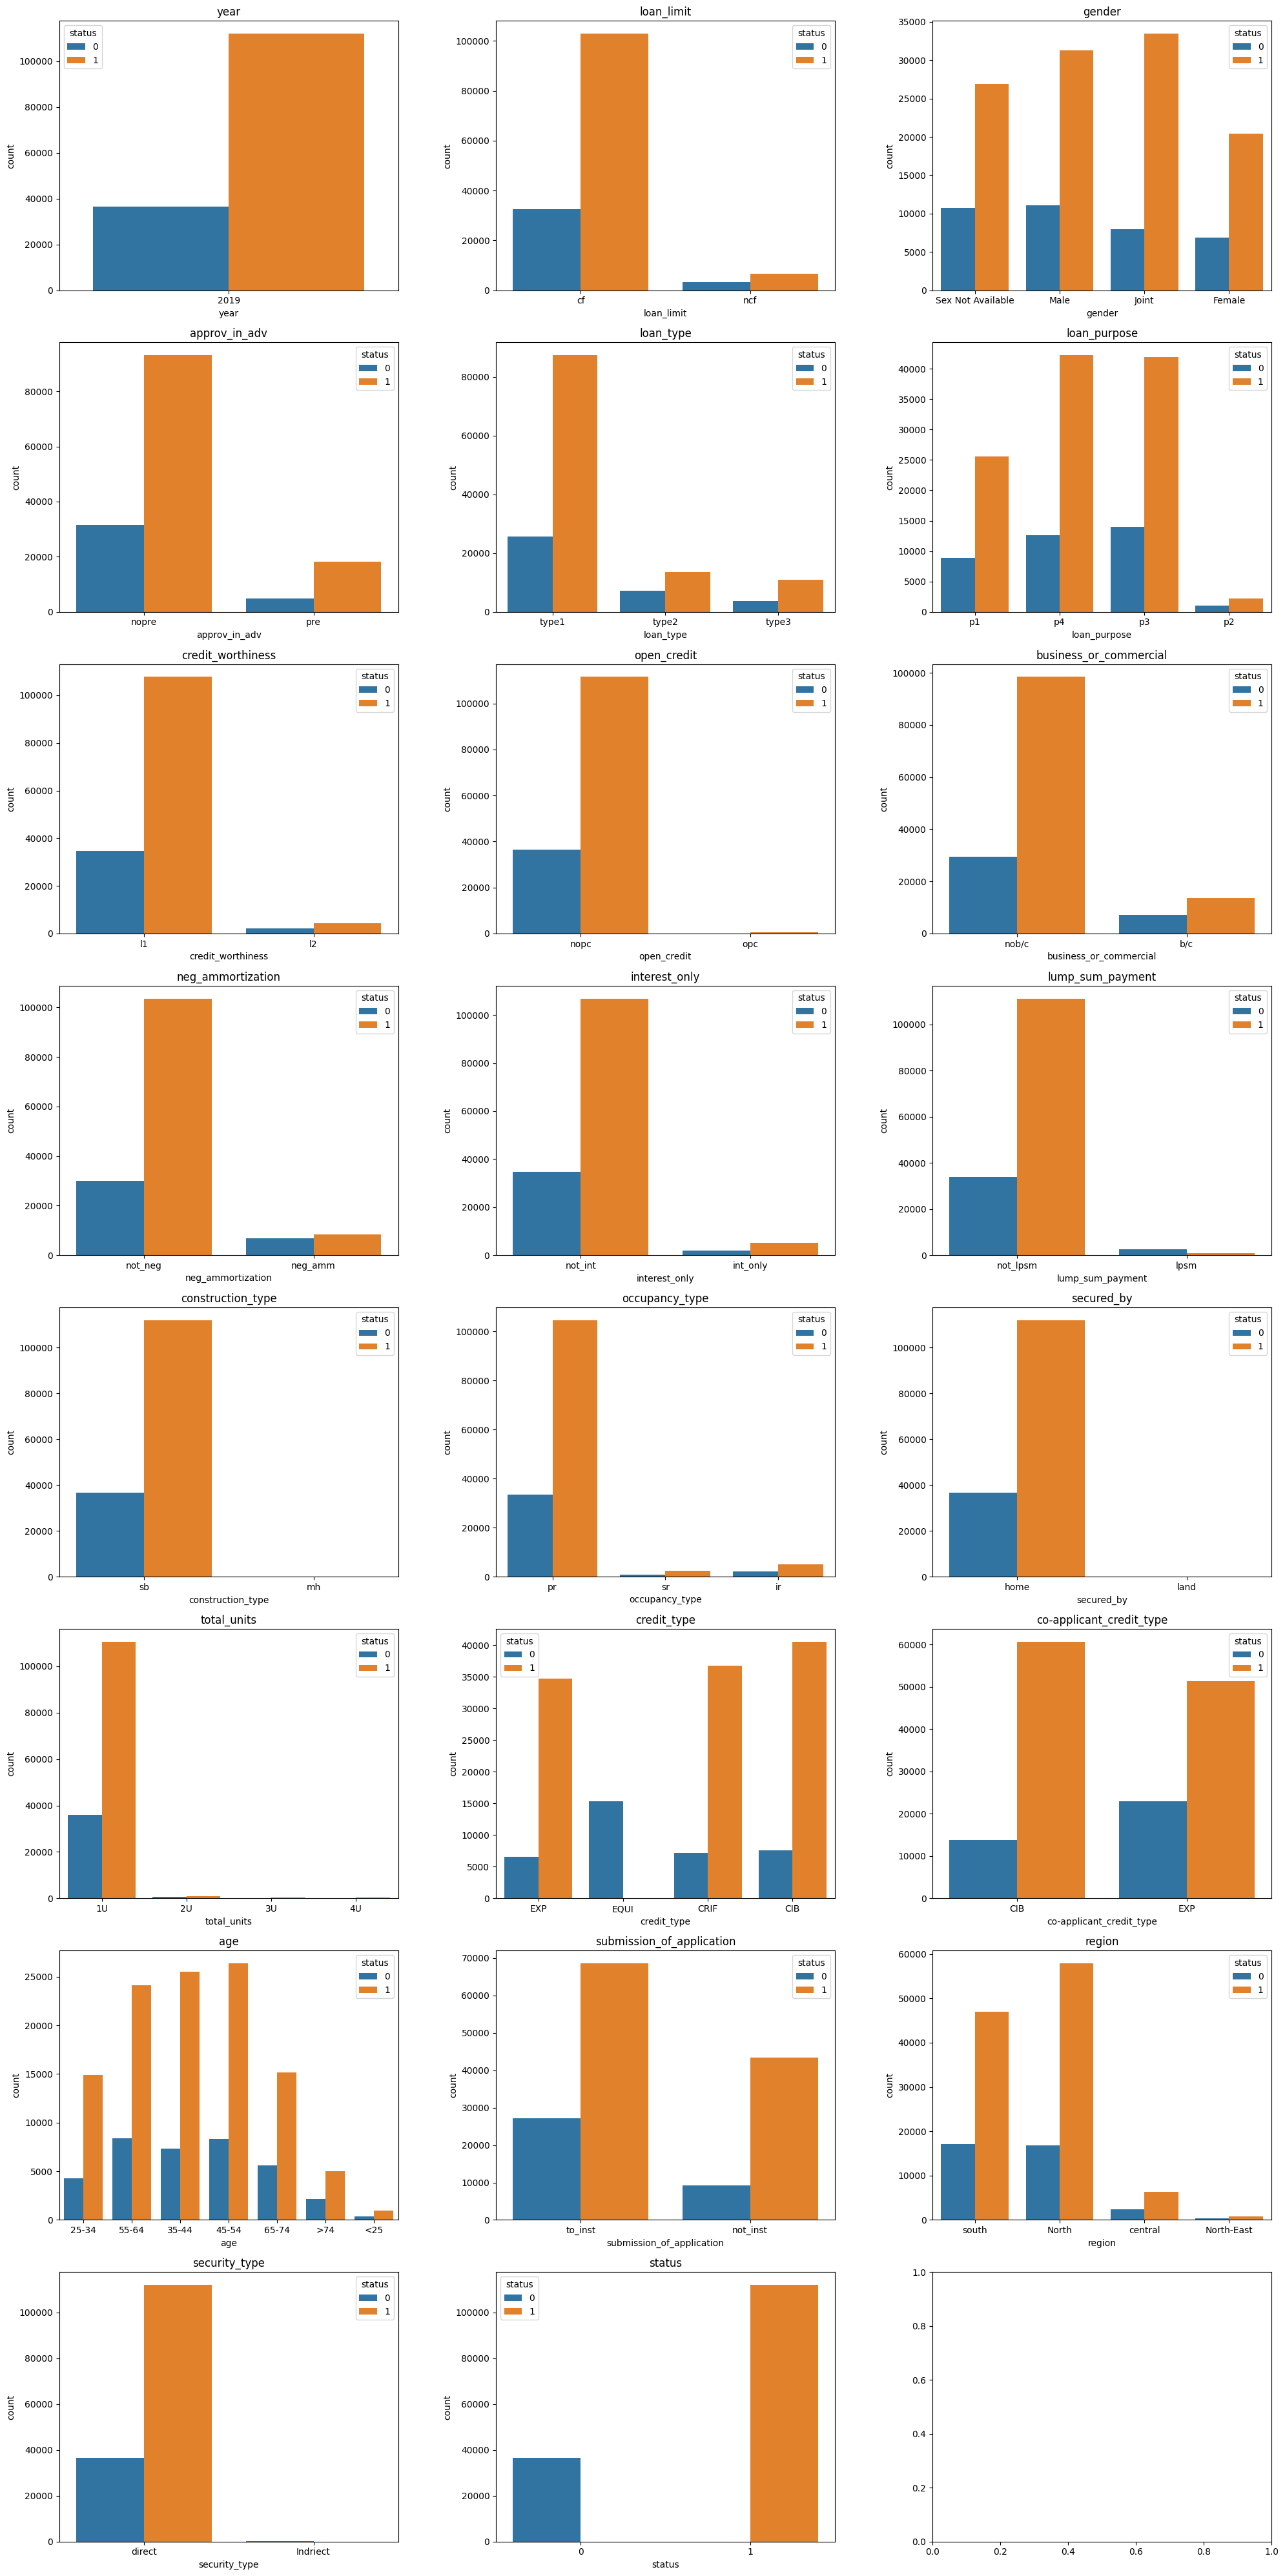

In [50]:
col = ['year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type',  'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type', 'status', ]

fig, axes = plt.subplots(nrows=len(col)//3+1, ncols=3, figsize=(20, 40))
for i in range(len(col)):
    sns.countplot(data=df, x=col[i], hue="status", ax=axes[i//3, i%3]) 
    axes[i//3, i%3].set_title(col[i])
plt.tight_layout(w_pad=5)
plt.show()

In [51]:
colg = ['year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type',  'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type', 'status', ]
for i in range(len(colg)):
  print(df[colg[i]].value_counts())
  print('\n')

year
2019    148670
Name: count, dtype: int64


loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64


gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64


loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64


loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


credit_worthiness
l1    142344
l2      6326
Name: count, dtype: int64


open_credit
nopc    148114
opc        556
Name: count, dtype: int64


business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


neg_ammortization
not_neg    133420
neg_amm     15129
Name: count, dtype: int64


interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64


lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64


construction_type
sb   

##Feature Selection

In [52]:
features = ['loan_type', 'loan_amount', 'loan_limit', 'business_or_commercial', 'neg_ammortization', 'rate_of_interest', 'term', 'property_value', 'income', 'credit_score', 'credit_type', 'co-applicant_credit_type', 'age', 'dtir1', 'security_type', 'status']
df = df[features]
df

,loan_type,loan_amount,loan_limit,business_or_commercial,neg_ammortization,rate_of_interest,term,property_value,income,credit_score,credit_type,co-applicant_credit_type,age,dtir1,security_type,status
0,type1,116500,cf,nob/c,not_neg,NaN,360.0,118000.0,1740.0,758,EXP,CIB,25-34,45.0,direct,0
1,type2,206500,cf,b/c,not_neg,NaN,360.0,NaN,4980.0,552,EQUI,EXP,55-64,NaN,direct,0
2,type1,406500,cf,nob/c,neg_amm,4.560,360.0,508000.0,9480.0,834,EXP,CIB,35-44,46.0,direct,1
3,type1,456500,cf,nob/c,not_neg,4.250,360.0,658000.0,11880.0,587,EXP,CIB,45-54,42.0,direct,1
4,type1,696500,cf,nob/c,not_neg,4.000,360.0,758000.0,10440.0,602,CRIF,EXP,25-34,39.0,direct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,cf,nob/c,not_neg,3.125,180.0,608000.0,7860.0,659,CIB,EXP,55-64,48.0,direct,1
148666,type1,586500,cf,nob/c,not_neg,5.190,360.0,788000.0,7140.0,569,CIB,CIB,25-34,15.0,direct,1
148667,type1,446500,cf,nob/c,not_neg,3.125,180.0,728000.0,6900.0,702,CIB,EXP,45-54,49.0,direct,1
148668,type1,196500,cf,nob/c,not_neg,3.500,180.0,278000.0,7140.0,737,EXP,EXP,55-64,29.0,direct,1


In [53]:
df.duplicated().sum()

2

In [54]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148668 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_type                 148668 non-null  object 
 1   loan_amount               148668 non-null  int64  
 2   loan_limit                145324 non-null  object 
 3   business_or_commercial    148668 non-null  object 
 4   neg_ammortization         148547 non-null  object 
 5   rate_of_interest          112230 non-null  float64
 6   term                      148627 non-null  float64
 7   property_value            133571 non-null  float64
 8   income                    139519 non-null  float64
 9   credit_score              148668 non-null  int64  
 10  credit_type               148668 non-null  object 
 11  co-applicant_credit_type  148668 non-null  object 
 12  age                       148468 non-null  object 
 13  dtir1                     124549 non-null  float6

In [56]:
df.isna().sum()

loan_type                       0
loan_amount                     0
loan_limit                   3344
business_or_commercial          0
neg_ammortization             121
rate_of_interest            36438
term                           41
property_value              15097
income                       9149
credit_score                    0
credit_type                     0
co-applicant_credit_type        0
age                           200
dtir1                       24119
security_type                   0
status                          0
dtype: int64

Replacing NaN values by mean in case of continous-value(int or float) features and by mode/most_frequent(object) in case of categorical features

In [57]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

imputer = SimpleImputer(strategy='most_frequent')
df[['neg_ammortization', 'loan_limit', 'age']] = imputer.fit_transform(df[['neg_ammortization', 'loan_limit', 'age']])

C:\Users\User\AppData\Local\Temp\ipykernel_18060\3240984962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])
C:\Users\User\AppData\Local\Temp\ipykernel_18060\3240984962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['neg_ammortization', 'loan_limit', 'age']] = imputer.fit_transform(df[['neg_ammortization', 'loan_limit', 'age']])


In [58]:
df.isna().sum()

loan_type                   0
loan_amount                 0
loan_limit                  0
business_or_commercial      0
neg_ammortization           0
rate_of_interest            0
term                        0
property_value              0
income                      0
credit_score                0
credit_type                 0
co-applicant_credit_type    0
age                         0
dtir1                       0
security_type               0
status                      0
dtype: int64

In [59]:
df.shape

(148668, 16)

In [60]:
df.status.value_counts()

status
1    112030
0     36638
Name: count, dtype: int64

In [61]:
df

,loan_type,loan_amount,loan_limit,business_or_commercial,neg_ammortization,rate_of_interest,term,property_value,income,credit_score,credit_type,co-applicant_credit_type,age,dtir1,security_type,status
0,type1,116500,cf,nob/c,not_neg,4.04548,360.0,118000.000000,1740.0,758,EXP,CIB,25-34,45.000000,direct,0
1,type2,206500,cf,b/c,not_neg,4.04548,360.0,497895.935495,4980.0,552,EQUI,EXP,55-64,37.732932,direct,0
2,type1,406500,cf,nob/c,neg_amm,4.56000,360.0,508000.000000,9480.0,834,EXP,CIB,35-44,46.000000,direct,1
3,type1,456500,cf,nob/c,not_neg,4.25000,360.0,658000.000000,11880.0,587,EXP,CIB,45-54,42.000000,direct,1
4,type1,696500,cf,nob/c,not_neg,4.00000,360.0,758000.000000,10440.0,602,CRIF,EXP,25-34,39.000000,direct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,cf,nob/c,not_neg,3.12500,180.0,608000.000000,7860.0,659,CIB,EXP,55-64,48.000000,direct,1
148666,type1,586500,cf,nob/c,not_neg,5.19000,360.0,788000.000000,7140.0,569,CIB,CIB,25-34,15.000000,direct,1
148667,type1,446500,cf,nob/c,not_neg,3.12500,180.0,728000.000000,6900.0,702,CIB,EXP,45-54,49.000000,direct,1
148668,type1,196500,cf,nob/c,not_neg,3.50000,180.0,278000.000000,7140.0,737,EXP,EXP,55-64,29.000000,direct,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148668 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_type                 148668 non-null  object 
 1   loan_amount               148668 non-null  int64  
 2   loan_limit                148668 non-null  object 
 3   business_or_commercial    148668 non-null  object 
 4   neg_ammortization         148668 non-null  object 
 5   rate_of_interest          148668 non-null  float64
 6   term                      148668 non-null  float64
 7   property_value            148668 non-null  float64
 8   income                    148668 non-null  float64
 9   credit_score              148668 non-null  int64  
 10  credit_type               148668 non-null  object 
 11  co-applicant_credit_type  148668 non-null  object 
 12  age                       148668 non-null  object 
 13  dtir1                     148668 non-null  float6

##EDA

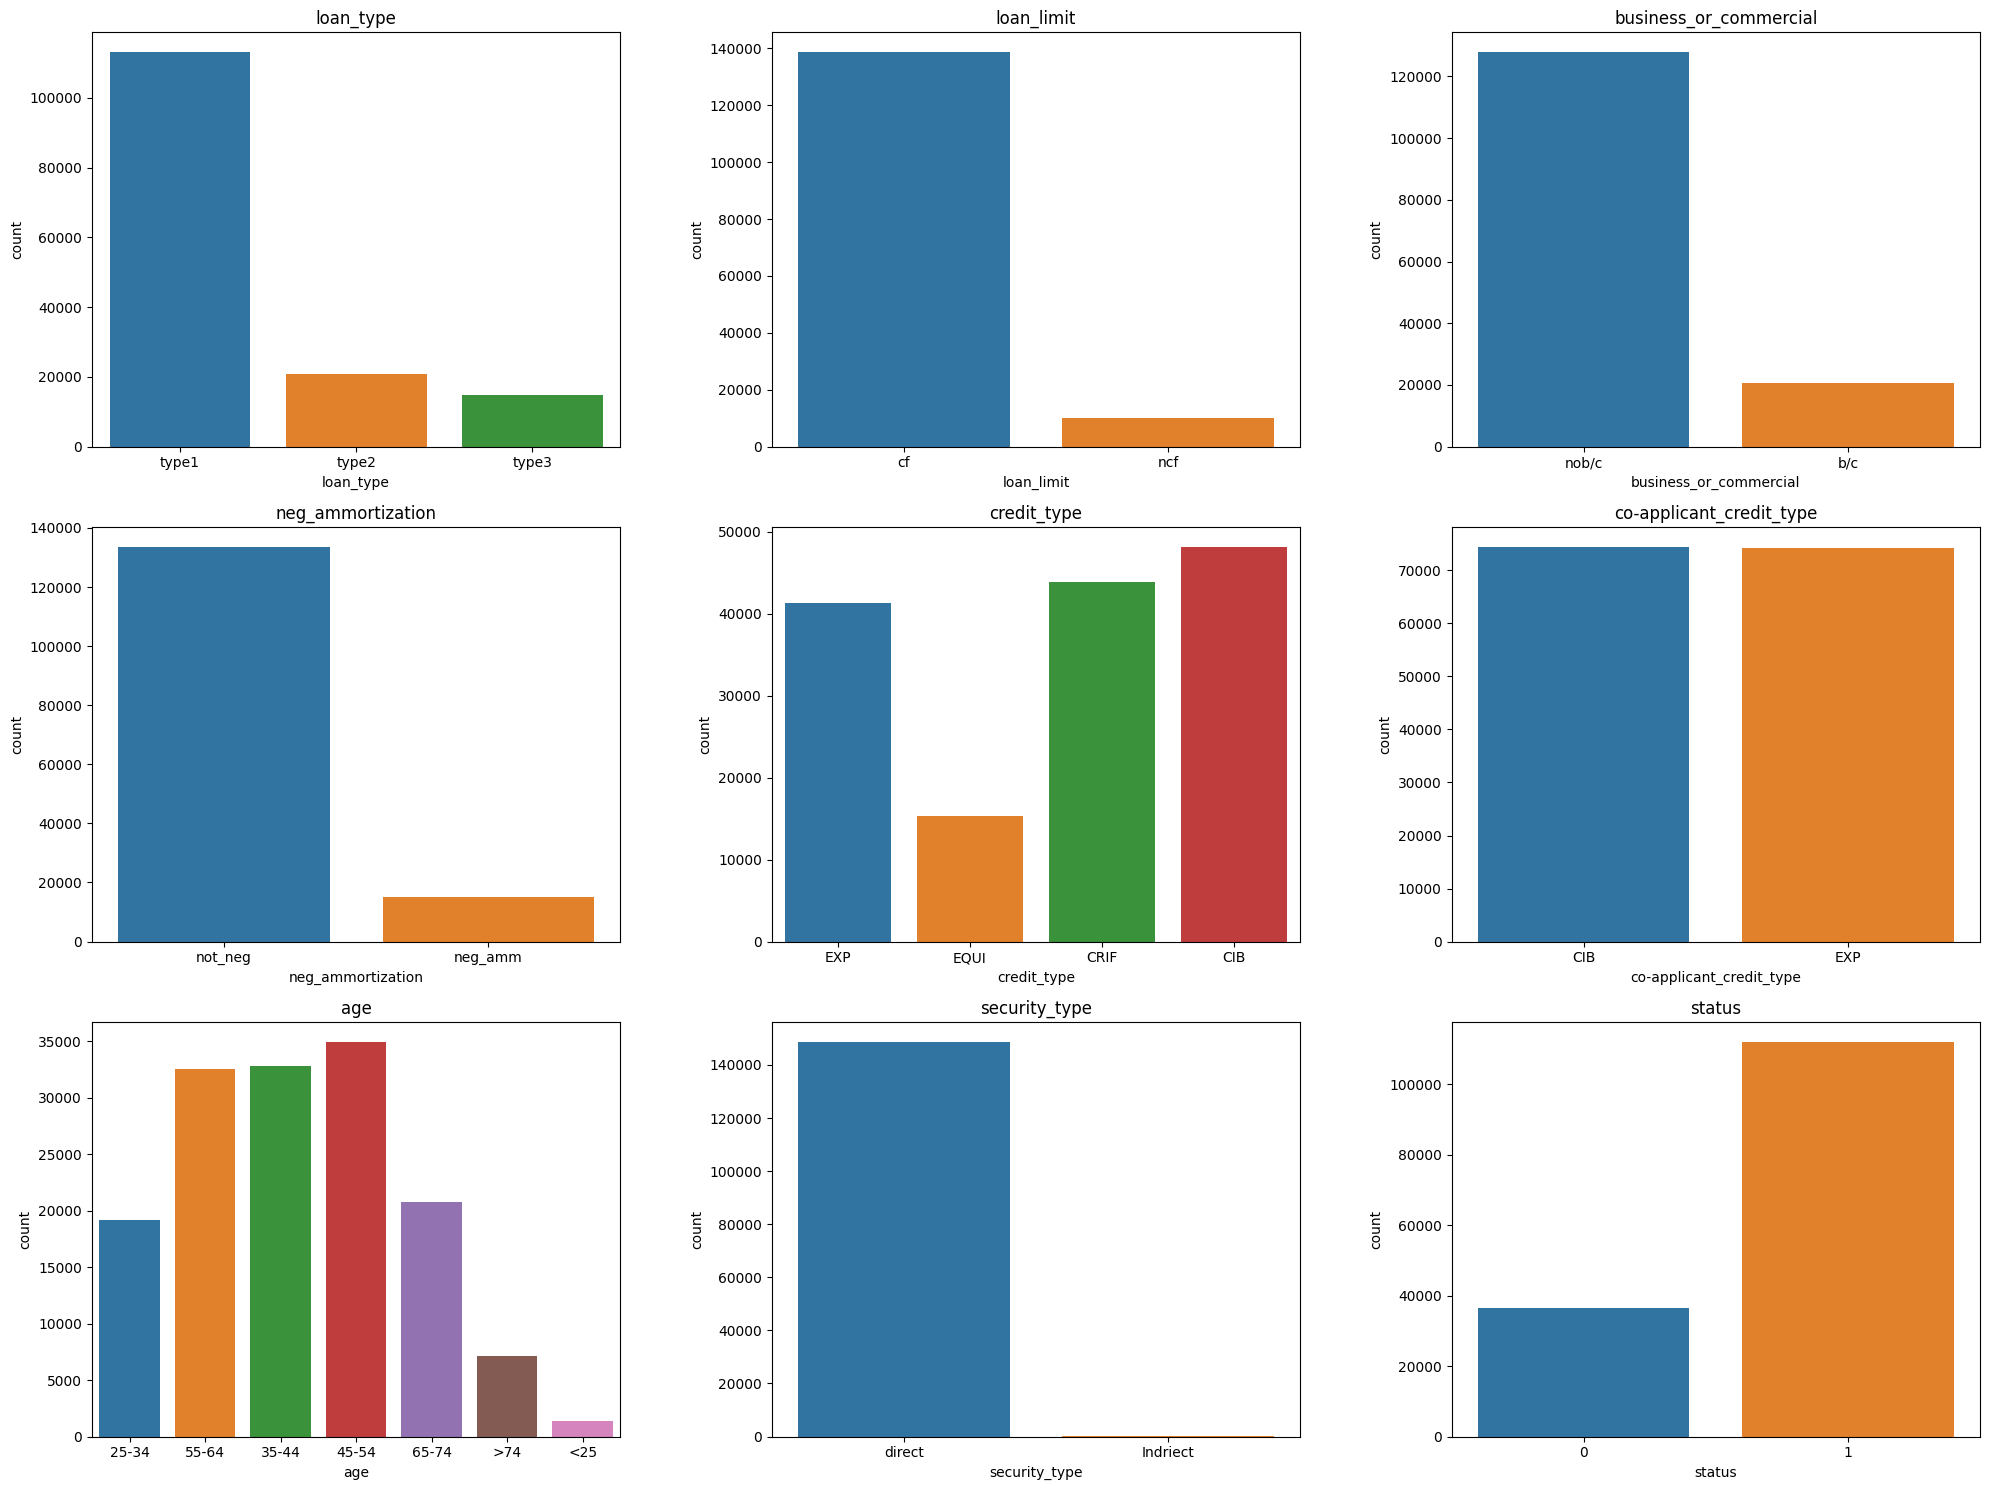

In [63]:
col = ['loan_type', 'loan_limit', 'business_or_commercial', 'neg_ammortization', 'credit_type', 'co-applicant_credit_type', 'age', 'security_type', 'status']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i in range(len(col)):
    sns.countplot(data=df, x=col[i], ax=axes[i//3, i%3]) 
    axes[i//3, i%3].set_title(col[i])
plt.tight_layout(w_pad=5)
plt.show()

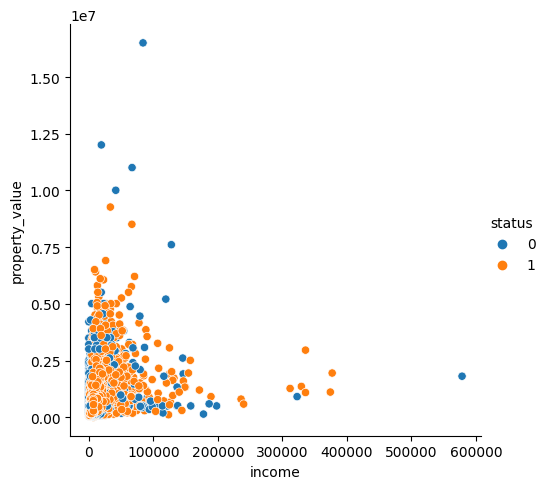

In [64]:
sns.relplot(data=df, x="income", y="property_value", hue="status")
plt.show()

In [65]:
colg = ['loan_type', 'loan_limit', 'business_or_commercial', 'neg_ammortization', 'credit_type', 'co-applicant_credit_type', 'age', 'security_type', 'status']
for i in range(len(colg)):
  print(df[colg[i]].value_counts())
  print('\n')

loan_type
type1    113172
type2     20761
type3     14735
Name: count, dtype: int64


loan_limit
cf     138690
ncf      9978
Name: count, dtype: int64


business_or_commercial
nob/c    127907
b/c       20761
Name: count, dtype: int64


neg_ammortization
not_neg    133539
neg_amm     15129
Name: count, dtype: int64


credit_type
CIB     48152
CRIF    43901
EXP     41318
EQUI    15297
Name: count, dtype: int64


co-applicant_credit_type
CIB    74391
EXP    74277
Name: count, dtype: int64


age
45-54    34919
35-44    32818
55-64    32534
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: count, dtype: int64


security_type
direct      148635
Indriect        33
Name: count, dtype: int64


status
1    112030
0     36638
Name: count, dtype: int64




In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148668 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_type                 148668 non-null  object 
 1   loan_amount               148668 non-null  int64  
 2   loan_limit                148668 non-null  object 
 3   business_or_commercial    148668 non-null  object 
 4   neg_ammortization         148668 non-null  object 
 5   rate_of_interest          148668 non-null  float64
 6   term                      148668 non-null  float64
 7   property_value            148668 non-null  float64
 8   income                    148668 non-null  float64
 9   credit_score              148668 non-null  int64  
 10  credit_type               148668 non-null  object 
 11  co-applicant_credit_type  148668 non-null  object 
 12  age                       148668 non-null  object 
 13  dtir1                     148668 non-null  float6

In [67]:
## categorical to binary conversion
from sklearn.preprocessing import LabelEncoder
binary_columns = ['loan_limit', 'business_or_commercial', 'neg_ammortization', 'co-applicant_credit_type', 'security_type']
label_encoder = LabelEncoder()
df[binary_columns] = df[binary_columns].apply(label_encoder.fit_transform)
df

C:\Users\User\AppData\Local\Temp\ipykernel_18060\894257584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_columns] = df[binary_columns].apply(label_encoder.fit_transform)


,loan_type,loan_amount,loan_limit,business_or_commercial,neg_ammortization,rate_of_interest,term,property_value,income,credit_score,credit_type,co-applicant_credit_type,age,dtir1,security_type,status
0,type1,116500,0,1,1,4.04548,360.0,118000.000000,1740.0,758,EXP,0,25-34,45.000000,1,0
1,type2,206500,0,0,1,4.04548,360.0,497895.935495,4980.0,552,EQUI,1,55-64,37.732932,1,0
2,type1,406500,0,1,0,4.56000,360.0,508000.000000,9480.0,834,EXP,0,35-44,46.000000,1,1
3,type1,456500,0,1,1,4.25000,360.0,658000.000000,11880.0,587,EXP,0,45-54,42.000000,1,1
4,type1,696500,0,1,1,4.00000,360.0,758000.000000,10440.0,602,CRIF,1,25-34,39.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,0,1,1,3.12500,180.0,608000.000000,7860.0,659,CIB,1,55-64,48.000000,1,1
148666,type1,586500,0,1,1,5.19000,360.0,788000.000000,7140.0,569,CIB,0,25-34,15.000000,1,1
148667,type1,446500,0,1,1,3.12500,180.0,728000.000000,6900.0,702,CIB,1,45-54,49.000000,1,1
148668,type1,196500,0,1,1,3.50000,180.0,278000.000000,7140.0,737,EXP,1,55-64,29.000000,1,1


In [68]:
## one-hot encoding
multi_columns = ["loan_type", "credit_type", "age"]
df = pd.get_dummies(df, columns=multi_columns)
df = df.astype(int)
df

,loan_amount,loan_limit,business_or_commercial,neg_ammortization,rate_of_interest,term,property_value,income,credit_score,co-applicant_credit_type,dtir1,security_type,status,loan_type_type1,loan_type_type2,loan_type_type3,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,0,1,1,4,360,118000,1740,758,0,45,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
1,206500,0,0,1,4,360,497895,4980,552,1,37,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,406500,0,1,0,4,360,508000,9480,834,0,46,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3,456500,0,1,1,4,360,658000,11880,587,0,42,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,696500,0,1,1,4,360,758000,10440,602,1,39,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,0,1,1,3,180,608000,7860,659,1,48,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
148666,586500,0,1,1,5,360,788000,7140,569,0,15,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
148667,446500,0,1,1,3,180,728000,6900,702,1,49,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
148668,196500,0,1,1,3,180,278000,7140,737,1,29,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


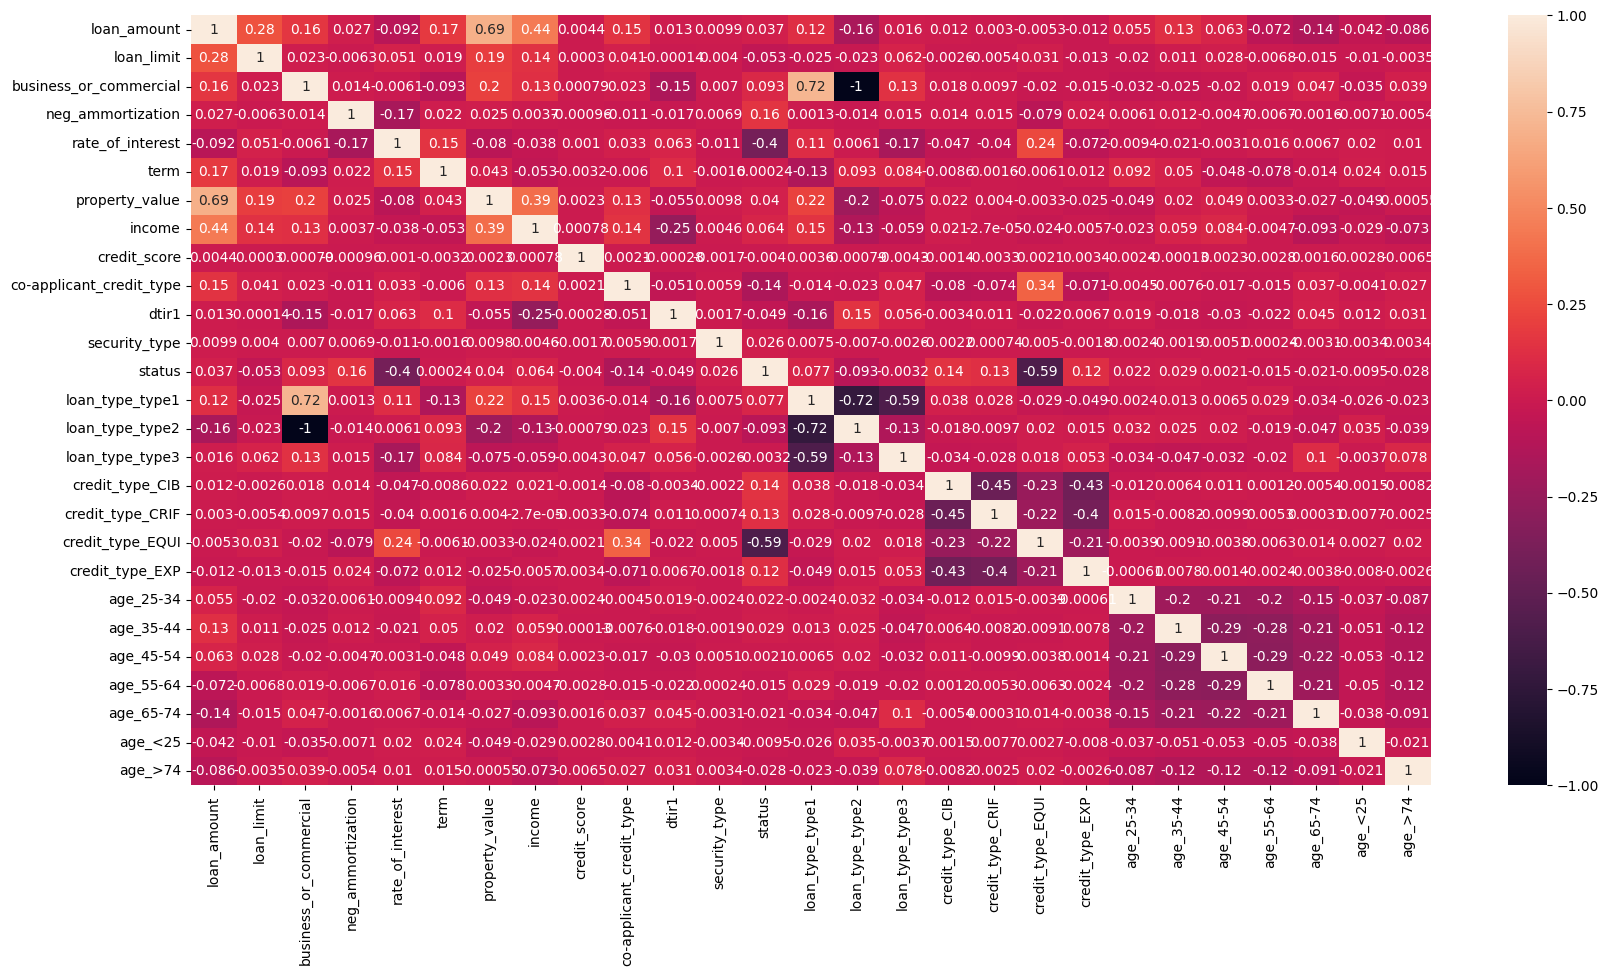

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148668 entries, 0 to 148669
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   loan_amount               148668 non-null  int32
 1   loan_limit                148668 non-null  int32
 2   business_or_commercial    148668 non-null  int32
 3   neg_ammortization         148668 non-null  int32
 4   rate_of_interest          148668 non-null  int32
 5   term                      148668 non-null  int32
 6   property_value            148668 non-null  int32
 7   income                    148668 non-null  int32
 8   credit_score              148668 non-null  int32
 9   co-applicant_credit_type  148668 non-null  int32
 10  dtir1                     148668 non-null  int32
 11  security_type             148668 non-null  int32
 12  status                    148668 non-null  int32
 13  loan_type_type1           148668 non-null  int32
 14  loan_type_type2          

In [71]:
df.describe()

,loan_amount,loan_limit,business_or_commercial,neg_ammortization,rate_of_interest,term,property_value,income,credit_score,co-applicant_credit_type,dtir1,security_type,status,loan_type_type1,loan_type_type2,loan_type_type3,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
count,1.486680e+05,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,1.486680e+05,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000,148668.000000
mean,3.311179e+05,0.067116,0.860353,0.898236,3.584780,335.136210,4.978958e+05,6957.321233,699.788166,0.499617,37.614026,0.999778,0.753558,0.761240,0.139647,0.099113,0.323889,0.295296,0.102894,0.277921,0.128750,0.220747,0.234879,0.218837,0.139532,0.008993,0.048262
std,1.839097e+05,0.250224,0.346621,0.302338,0.585327,58.401351,3.411708e+05,6293.534215,115.876303,0.500002,9.655965,0.014897,0.430940,0.426327,0.346621,0.298815,0.467960,0.456177,0.303821,0.447976,0.334924,0.414752,0.423925,0.413459,0.346502,0.094405,0.214320
min,1.650000e+04,0.000000,0.000000,0.000000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.965000e+05,0.000000,1.000000,1.000000,3.000000,360.000000,2.880000e+05,3840.000000,599.000000,0.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.965000e+05,0.000000,1.000000,1.000000,4.000000,360.000000,4.580000e+05,6000.000000,699.000000,0.000000,37.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.365000e+05,0.000000,1.000000,1.000000,4.000000,360.000000,5.980000e+05,8280.000000,800.000000,1.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.576500e+06,1.000000,1.000000,1.000000,8.000000,360.000000,1.650800e+07,578580.000000,900.000000,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Model

In [72]:
y = df.status
x = df.drop(['status'], axis=1)

In [73]:
print(x.shape,y.shape)

(148668, 26) (148668,)


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(111501, 26) (37167, 26) (111501,) (37167,)


In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print(f'training : {lr.score(x_train,y_train)}')
print(f'testing : {lr.score(x_test,y_test)}')
print(f'f1 : {f1_score(y_test,y_pred)}')

training : 0.7533564721392634
testing : 0.754163639787984
f1 : 0.8598555148243017


In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)
print(f'training : {dtc.score(x_train,y_train)}')
print(f'testing : {dtc.score(x_test,y_test)}')
print(f'f1 : {f1_score(y_test,y_pred)}')

training : 1.0
testing : 0.8457233567411951
f1 : 0.8970926058865758


In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [79]:
y_pred = rfc.predict(x_test)
f1_score = f1_score(y_test,y_pred)
print(f'F1-score : {f1_score}')

F1-score : 0.9290490723912075


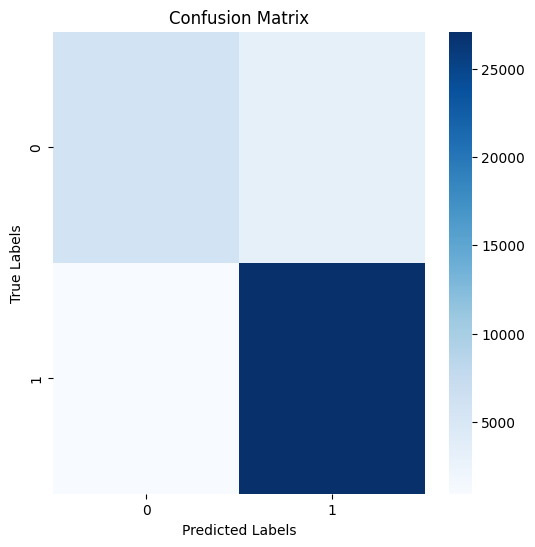

In [80]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()